In [1]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm
from collections import defaultdict
from itertools import combinations

from load_graph import *

DBLP: min coms is 1 and max is 124
DBLP: min coms is 1 and max is 10
DBLP: min coms is 1 and max is 9
DBLP: min coms is 1 and max is 26
DBLP: min coms is 1 and max is 124


100%|██████████| 317080/317080 [00:01<00:00, 181690.12it/s]


Skipped 11112 nodes.


100%|██████████| 317080/317080 [00:01<00:00, 300734.74it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:00<00:00, 326438.31it/s]


Skipped 0 nodes.


100%|██████████| 317080/317080 [00:02<00:00, 135271.77it/s]


Skipped 3030 nodes.


100%|██████████| 317080/317080 [00:01<00:00, 236051.57it/s]


Skipped 10751 nodes.


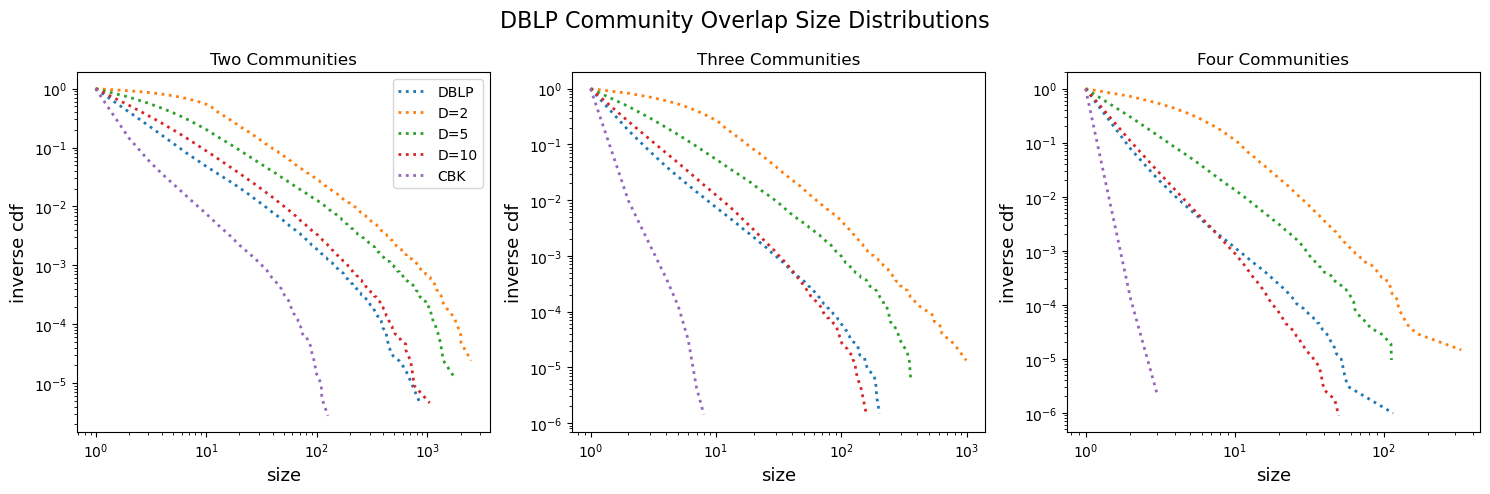

In [2]:
## DBLP graph
g, coms = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_dblp_d2_com.dat", True)
_, abcdoo_d5 = load_coms("data/abcdoo_dblp_d5_com.dat", True)
_, abcdoo_d10 = load_coms("data/abcdoo_dblp_d10_com.dat", True)
_, cbk = load_coms("data/dblp_cbk.dat", True)

print(f"DBLP: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"DBLP: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"DBLP: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10: # TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=2, original_data=False, linestyle=":", label=name)
        axs[i].set_xlabel("size", fontsize=13)
        axs[i].set_ylabel("inverse cdf", fontsize=13)

axs[0].legend()
axs[0].set_title("Two Communities")
axs[1].set_title("Three Communities") 
axs[2].set_title("Four Communities") 
plt.suptitle("DBLP Community Overlap Size Distributions", fontsize=16)
plt.tight_layout()

Amazon: min coms is 1 and max is 116
Amazon: min coms is 1 and max is 21
Amazon: min coms is 1 and max is 20
Amazon: min coms is 1 and max is 48
Amazon: min coms is 1 and max is 49


100%|██████████| 334863/334863 [00:10<00:00, 33334.17it/s]


Skipped 55553 nodes.


100%|██████████| 334863/334863 [00:15<00:00, 21392.68it/s]


Skipped 42848 nodes.


100%|██████████| 334863/334863 [00:22<00:00, 14690.11it/s]


Skipped 26985 nodes.


100%|██████████| 334863/334863 [00:12<00:00, 27045.88it/s]


Skipped 57211 nodes.


100%|██████████| 334863/334863 [00:00<00:00, 1280046.75it/s]


Skipped 62 nodes.


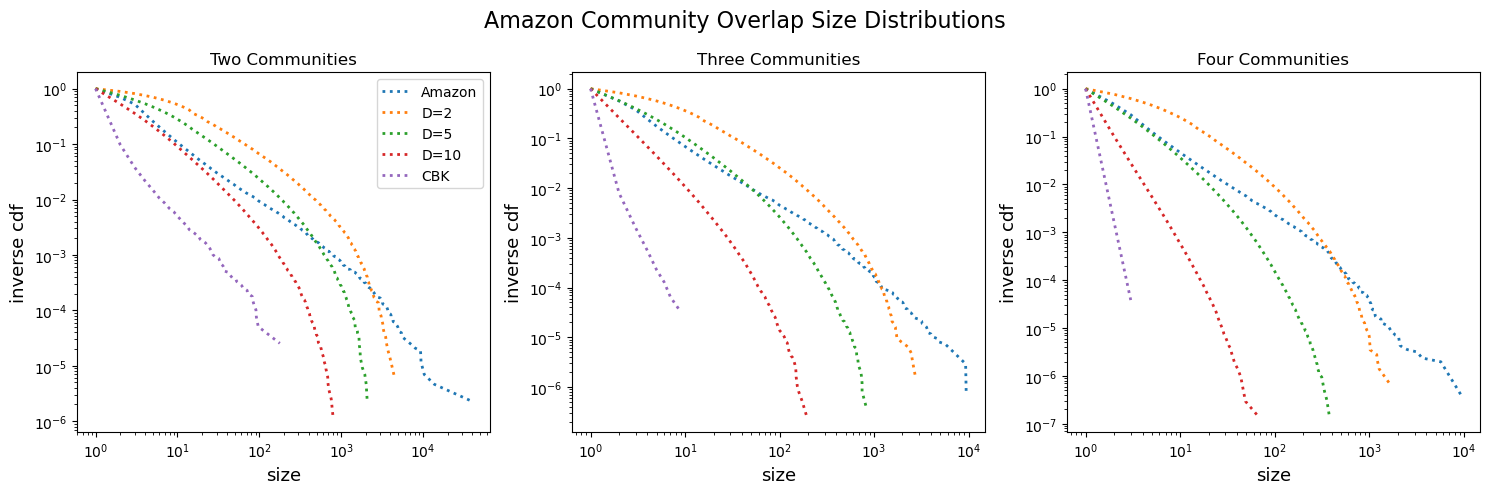

In [3]:
## Amazon graph
g, coms = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_amazon_d2_com.dat", True)
_, abcdoo_d5 = load_coms("data/abcdoo_amazon_d5_com.dat", True)
_, abcdoo_d10 = load_coms("data/abcdoo_amazon_d10_com.dat", True)
_, cbk = load_coms("data/amazon_cbk.dat", True)

print(f"Amazon: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"Amazon: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"Amazon: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]

for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10:  #TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=2, original_data=False, linestyle=":", label=name)
        axs[i].set_xlabel("size", fontsize=13)
        axs[i].set_ylabel("inverse cdf", fontsize=13)

axs[0].legend()
axs[0].set_title("Two Communities")
axs[1].set_title("Three Communities") 
axs[2].set_title("Four Communities") 
plt.suptitle("Amazon Community Overlap Size Distributions", fontsize=16)
plt.tight_layout()

Youtube: min coms is 1 and max is 227
D2: min coms is 1 and max is 7
D5: min coms is 1 and max is 8
D10: min coms is 1 and max is 21
CBK: min coms is 1 and max is 124


100%|██████████| 52675/52675 [00:00<00:00, 228072.73it/s]


Skipped 1616 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 465638.93it/s]


Skipped 0 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 443818.29it/s]


Skipped 0 nodes.


100%|██████████| 52675/52675 [00:00<00:00, 177065.98it/s]


Skipped 326 nodes.


100%|██████████| 317080/317080 [00:01<00:00, 234725.56it/s]


Skipped 10751 nodes.


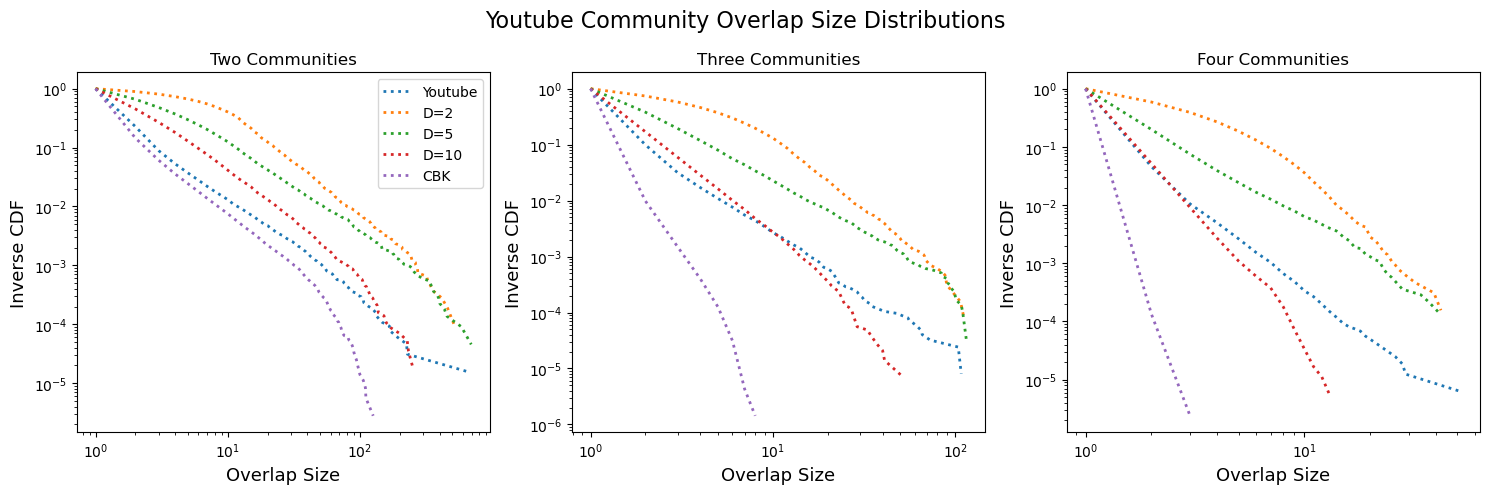

In [4]:
## Youtube graph
g, coms = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
real = g.vs["comms"]
_, abcdoo_d2 = load_coms("data/abcdoo_youtube_d2_com.dat", False)
_, abcdoo_d5 = load_coms("data/abcdoo_youtube_d5_com.dat", False)
_, abcdoo_d10 = load_coms("data/abcdoo_youtube_d10_com.dat", False)
_, cbk = load_coms("data/dblp_cbk.dat", False)

print(f"Youtube: min coms is {np.min([len(c) for c in real if len(c) > 0])} and max is {np.max([len(c) for c in real])}")
print(f"D2: min coms is {np.min([len(c) for c in abcdoo_d2 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d2])}")
print(f"D5: min coms is {np.min([len(c) for c in abcdoo_d5 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d5])}")
print(f"D10: min coms is {np.min([len(c) for c in abcdoo_d10 if len(c) > 0])} and max is {np.max([len(c) for c in abcdoo_d10])}")
print(f"CBK: min coms is {np.min([len(c) for c in cbk if len(c) > 0])} and max is {np.max([len(c) for c in cbk])}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
options = [real, abcdoo_d2, abcdoo_d5, abcdoo_d10, cbk]
names = ["Youtube", "D=2", "D=5", "D=10", "CBK"]
for coms, name in zip(options, names):
    two_overlaps = defaultdict(int)
    three_overlaps = defaultdict(int)
    four_overlaps = defaultdict(int)
    skipped = 0
    for com in tqdm(coms):
        if len(com) > 10: #TODO don't skip
            skipped += 1
            continue
        for k2 in combinations(com, 2):
            two_overlaps[tuple(sorted(k2))] += 1
        for k3 in combinations(com, 3):
            three_overlaps[tuple(sorted(k3))] += 1
        for k4 in combinations(com, 4):
            four_overlaps[tuple(sorted(k4))] += 1
    print(f"Skipped {skipped} nodes.")

    for i, overlaps in enumerate([two_overlaps, three_overlaps, four_overlaps]):
        X = powerlaw.Fit(list(overlaps.values()), xmin=1)
        X.plot_ccdf(ax=axs[i], linewidth=2, original_data=False, linestyle=":", label=name)        
        axs[i].set_xlabel("Overlap Size", fontsize=13)
        axs[i].set_ylabel("Inverse CDF", fontsize=13)

axs[0].legend()
axs[0].set_title("Two Communities")
axs[1].set_title("Three Communities") 
axs[2].set_title("Four Communities") 
plt.suptitle("Youtube Community Overlap Size Distributions", fontsize=16)
plt.tight_layout()